# Step 1: Load & Explore a Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Load Dataset

iris = load_iris()

X = iris.data #features
y = iris.target # labels

df = pd.DataFrame(X, columns=iris.feature_names)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df1 = pd.DataFrame(y)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [5]:
for i in df1[0].unique():
    print(f'{i}: {iris.target_names[i]}')

0: setosa
1: versicolor
2: virginica


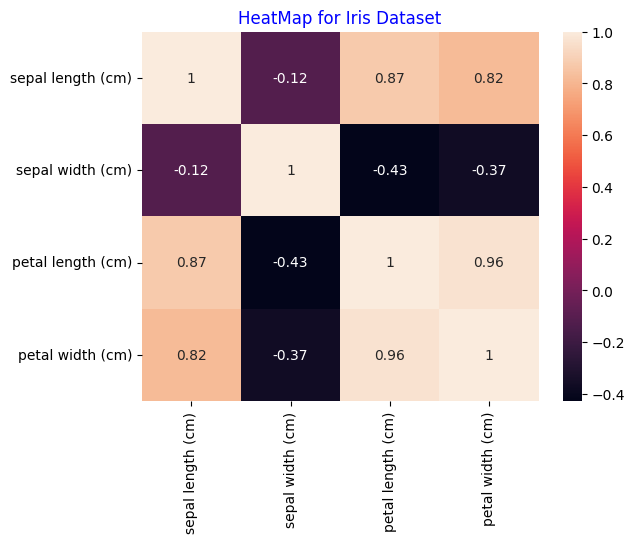

In [6]:
sns.heatmap(df.corr(), annot=True)
plt.title("HeatMap for Iris Dataset",color='b')
plt.show()

# train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (120, 4)
Test set size: (30, 4)


# classification model: Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predictions:", y_pred[:10])
print("Actual:", y_test[:10])

Predictions: [1 0 2 1 1 0 1 2 1 1]
Actual: [1 0 2 1 1 0 1 2 1 1]


# Evaluate the Model

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

accuracy:  1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/sms-spam-collection-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [11]:
import pandas as pd

# Load the dataset
df2 = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1")

# Keep only the relevant columns: label and message
df2 = df2[['v1', 'v2']]
df2.columns = ['label', 'message']

# Preview the data
print(df2.head())
print("Total rows:", df2.shape[0])
print("Labels count:\n", df2['label'].value_counts())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Total rows: 5572
Labels count:
 label
ham     4825
spam     747
Name: count, dtype: int64


In [12]:
df2.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Convert Labels to Numbers

In [13]:
df2["label_num"] = df2["label"].map({"ham": 0 , "spam": 1})
df2[["label_num","label"]].head()

,label_num,label
0,0,ham
1,0,ham
2,1,spam
3,0,ham
4,0,ham


# Text Cleaning

In [14]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '' ,text)
    return text

df2['clean_message'] = df2['message'].apply(clean_text)


In [15]:
df2['clean_message'].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: clean_message, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Convert text to numeric vectors
X = vectorizer.fit_transform(df2['clean_message'])

print("Shape of X:", X.shape)


Shape of X: (5572, 8512)


In [17]:
from sklearn.model_selection import train_test_split

y = df2['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (4457, 8512)
Test set: (1115, 8512)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Convert messages into TF-IDF features
X_tfidf = tfidf.fit_transform(df2['clean_message'])

print("Shape of TF-IDF matrix:", X_tfidf.shape)


Shape of TF-IDF matrix: (5572, 8512)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the model
model = MultinomialNB()

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9506726457399103

Confusion Matrix:
 [[965   0]
 [ 55  95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       1.00      0.63      0.78       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF features
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df2['clean_message'])
y = df2['label_num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9605381165919282

Confusion Matrix:
 [[965   0]
 [ 44 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

